## Import neccessary Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, LabelEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

## Dataset Description
**Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:** 

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary 
education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

**These grades are related with the course subject, Math or Portuguese:**

31 G1 - first period grade (numeric: from 0 to 20)

32 G2 - second period grade (numeric: from 0 to 20)

33 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [26]:
math_data_new = pd.read_csv('student_data/student_mat_new.csv', sep=',')
math_data_new.head()

,specialty,sex,under_18,famsize,Mjob,Fjob,reason,socialcohabitation,traveltime,studytime,failures,schoolsup,selfpayfees,activities,catch-up,internet,romantic,famrel,freetime,goout,health,absences,G3
0,MI,F,GE18,GT3,Unemployed,Employee,course,guardian,2,2,0,yes,no,no,yes,no,no,4,3,4,3,6,6
1,MI,F,U18,GT3,Unemployed,Contractor,course,alone,1,2,0,no,no,no,yes,yes,no,5,3,3,3,4,6
2,IN,F,U18,LE3,Unemployed,Contractor,other,guardian,1,2,3,yes,yes,no,yes,yes,no,4,3,2,3,10,10
3,MI,F,U18,GT3,employee,Civil_Servant,home,guardian,1,3,0,no,yes,yes,yes,yes,yes,3,2,2,5,2,15
4,IN,F,U18,GT3,unemployed,Contractor,home,alone,1,2,0,no,yes,no,yes,no,no,4,3,2,5,4,10


## Data Preprocessing

- Let's a copy of our original dataset for manipulation

In [27]:
# Make a copy of the original dataframe
math_data_new_copy = math_data_new.copy()

In [28]:
math_data_new_copy.head()

,specialty,sex,under_18,famsize,Mjob,Fjob,reason,socialcohabitation,traveltime,studytime,failures,schoolsup,selfpayfees,activities,catch-up,internet,romantic,famrel,freetime,goout,health,absences,G3
0,MI,F,GE18,GT3,Unemployed,Employee,course,guardian,2,2,0,yes,no,no,yes,no,no,4,3,4,3,6,6
1,MI,F,U18,GT3,Unemployed,Contractor,course,alone,1,2,0,no,no,no,yes,yes,no,5,3,3,3,4,6
2,IN,F,U18,LE3,Unemployed,Contractor,other,guardian,1,2,3,yes,yes,no,yes,yes,no,4,3,2,3,10,10
3,MI,F,U18,GT3,employee,Civil_Servant,home,guardian,1,3,0,no,yes,yes,yes,yes,yes,3,2,2,5,2,15
4,IN,F,U18,GT3,unemployed,Contractor,home,alone,1,2,0,no,yes,no,yes,no,no,4,3,2,5,4,10


- **Encoding categorical data**: We will be using **OneHotEncoder** to convert/encode nominal variables and **Label encoder** for ordinal variable that are still in text form

In [29]:
# Select ordinal and binary variables to encode
ordinal_cols = ["under_18", "famsize", "schoolsup", "selfpayfees", "activities", "catch-up", "internet", "romantic"]

# Select nominal variables to encode
nominal_cols = ["specialty", "sex", "Mjob", "Fjob", "reason", "socialcohabitation"]
# Initialize OneHotEncoder
# ohe = OneHotEncoder()
# Encode nominal variables
# math_data_new_copy[nominal_cols] = math_data_new_copy[nominal_cols].apply(lambda col: pd.get_dummies(col , prefix= col.name))

# Select categorical variables
categorical_cols = ordinal_cols + nominal_cols

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
math_data_new_copy[categorical_cols] = math_data_new_copy[categorical_cols].apply(lambda col: le.fit_transform(col))

In [30]:
#Check if encoding was successful
math_data_new_copy.head()

,specialty,sex,under_18,famsize,Mjob,Fjob,reason,socialcohabitation,traveltime,studytime,failures,schoolsup,selfpayfees,activities,catch-up,internet,romantic,famrel,freetime,goout,health,absences,G3
0,2,0,0,0,0,2,0,1,2,2,0,1,0,0,1,0,0,4,3,4,3,6,6
1,2,0,1,0,0,1,0,0,1,2,0,0,0,0,1,1,0,5,3,3,3,4,6
2,0,0,1,1,0,1,2,1,1,2,3,1,1,0,1,1,0,4,3,2,3,10,10
3,2,0,1,0,2,0,1,1,1,3,0,0,1,1,1,1,1,3,2,2,5,2,15
4,0,0,1,0,3,1,1,0,1,2,0,0,1,0,1,0,0,4,3,2,5,4,10


- Encode grade(G3) to reflect fail or pass

In [31]:
# def assign_fail_pass(numeric_grade):
#     '''This function checks the numeric grade is greater than or equals 10 and assigns pass(1). 
#     If the score is less than 10, then it gets a fail(0) '''
#     if numeric_grade >= 10:
#         return 1
#     else: 
#         return 0

# Assign 1 for pass and 0 for fail
math_data_new_copy["G3"] = np.where(math_data_new_copy["G3"] >= 10, 1, 0)


In [32]:
math_data_new_copy.head()

,specialty,sex,under_18,famsize,Mjob,Fjob,reason,socialcohabitation,traveltime,studytime,failures,schoolsup,selfpayfees,activities,catch-up,internet,romantic,famrel,freetime,goout,health,absences,G3
0,2,0,0,0,0,2,0,1,2,2,0,1,0,0,1,0,0,4,3,4,3,6,0
1,2,0,1,0,0,1,0,0,1,2,0,0,0,0,1,1,0,5,3,3,3,4,0
2,0,0,1,1,0,1,2,1,1,2,3,1,1,0,1,1,0,4,3,2,3,10,1
3,2,0,1,0,2,0,1,1,1,3,0,0,1,1,1,1,1,3,2,2,5,2,1
4,0,0,1,0,3,1,1,0,1,2,0,0,1,0,1,0,0,4,3,2,5,4,1


- Seperate the data into Features (X) and Target(y) : Here our **target** is **G3** and rest of the columns are **features**

In [33]:
y = math_data_new_copy["G3"]
X = math_data_new_copy.drop(["G3"], axis=1)

- Split the data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Scale and Centre the Data**: Since we will be using the Radial Basis Function (RBF) kernel with our Support Vector Machine, we need to scale the data. Thatis each column should have a mean of 0 and a standard deviation of 1.

In [39]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Machine Learning Model Building

- Define the support vector machine classifier model and train on the data

In [40]:
clf_svm = SVC(kernel='rbf', C=1.0, random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

- Test the model on the test data and visualize the results as a Confusion Matrix
    - **Confusion Matrix**: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

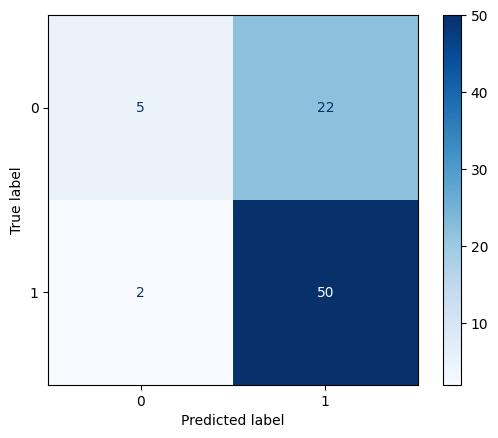

In [41]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, cmap=plt.cm.Blues, values_format='d');

In [42]:
y_pred = clf_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.19      0.29        27
           1       0.69      0.96      0.81        52

    accuracy                           0.70        79
   macro avg       0.70      0.57      0.55        79
weighted avg       0.70      0.70      0.63        79



In [43]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {acc*100:.1f}%")

Accuracy Percentage: 69.6%


## Results (TO BE UPDATED)

Recall
- Out of all the students who passed, the model predicted 88% correctly 
- Out of all the students who failed, the model predicted 93% correctly

Precision
- Out of all the students the model predicted to pass, 96% actually passed
- Out of all the students the model predicted to fail, 81% actually failed 

### SAVE MODEL

In [46]:
joblib.dump(clf_svm, "student_model.pkl")

['student_model.pkl']